In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Pokemon.csv")


In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.shape

(800, 13)

## name
## type 1
## type 2 
## total 
## HP
## Attack
## defense
## sp.atk
##  sp.def
## speed
## generation
## legendary

In [5]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## Data cleaning

In [6]:
df.rename(columns={"#": "Index"}, inplace=True) 

In [7]:
df

,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [8]:
df.dtypes["Generation"]

dtype('int64')

In [9]:
df["Attack"].max()

190

# DATA VISUALIZATION

In [10]:
df_types1 = pd.DataFrame(df["Type 1"])

In [11]:
df_types1

,Type 1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire
...,...
795,Rock
796,Rock
797,Psychic
798,Psychic


Text(0, 0.5, 'Counts')

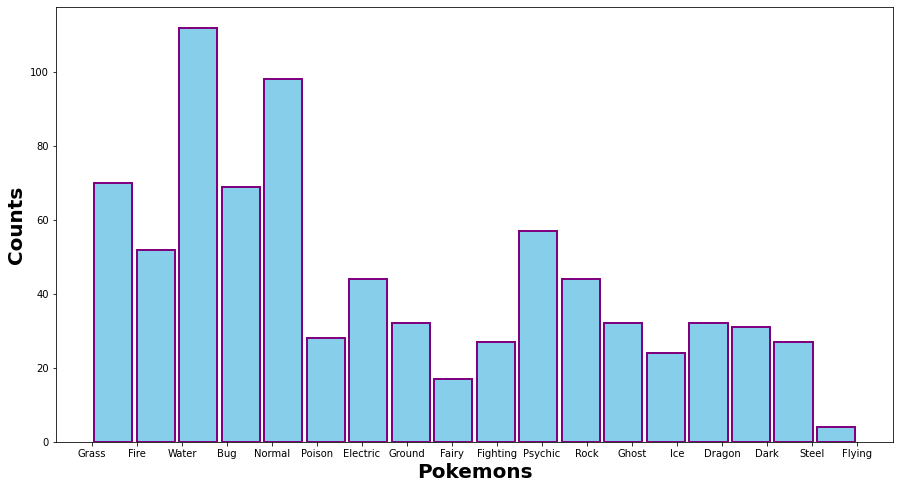

In [23]:
pokemons_type_counts = plt.hist(df["Type 1"], bins = 18, rwidth = 0.9,
                                linewidth = 2, edgecolor='purple', color='skyblue')
plt.gcf().set_size_inches(15,8)
plt.xlabel("Pokemons", fontweight = "bold", fontsize = 20)
plt.ylabel("Counts", fontweight = "bold",fontsize = 20)

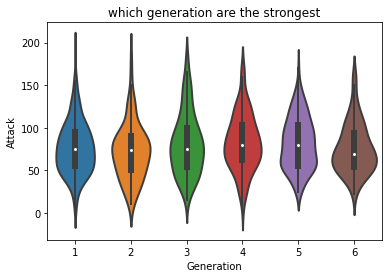

In [13]:
df_gen_att = sns.violinplot(x= df.Generation, y =df.Attack, linewidth = 2).set_title('which generation are the strongest')

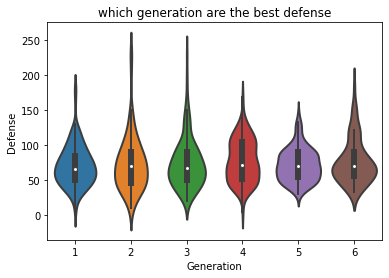

In [18]:
df_gen_def = sns.violinplot(x= df.Generation, y =df.Defense, linewidth = 2).set_title('which generation are the best defense')

In [15]:
df_strong_pok = df
strong_pok = df.sort_values(by='Attack')
strong_pok.tail()

,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


Text(0, 0.5, 'Counts')

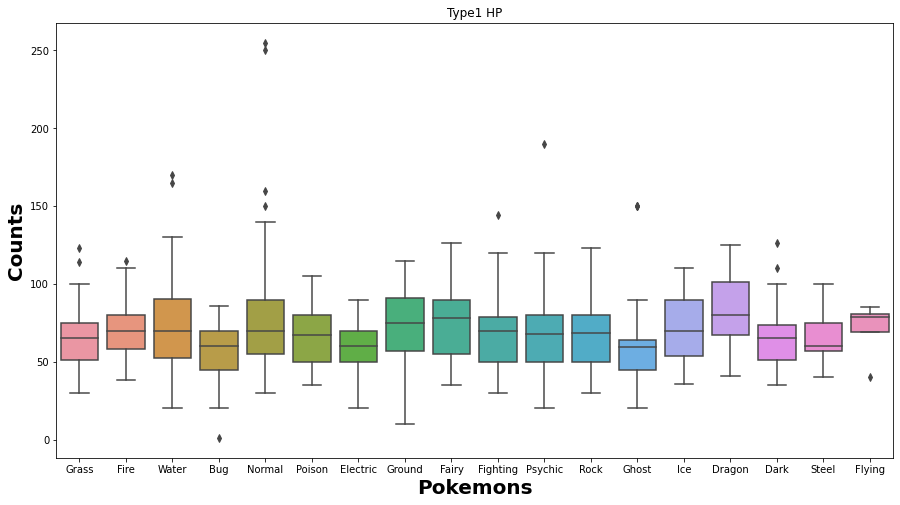

In [20]:
hp_gen = sns.boxplot(x=df['Type 1'], y= df['HP']).set_title('Type1 HP')
plt.gcf().set_size_inches(15,8)
plt.xlabel("Pokemons", fontweight = "bold", fontsize = 20)
plt.ylabel("Counts", fontweight = "bold",fontsize = 20)

Text(0, 0.5, 'DEFENSE')

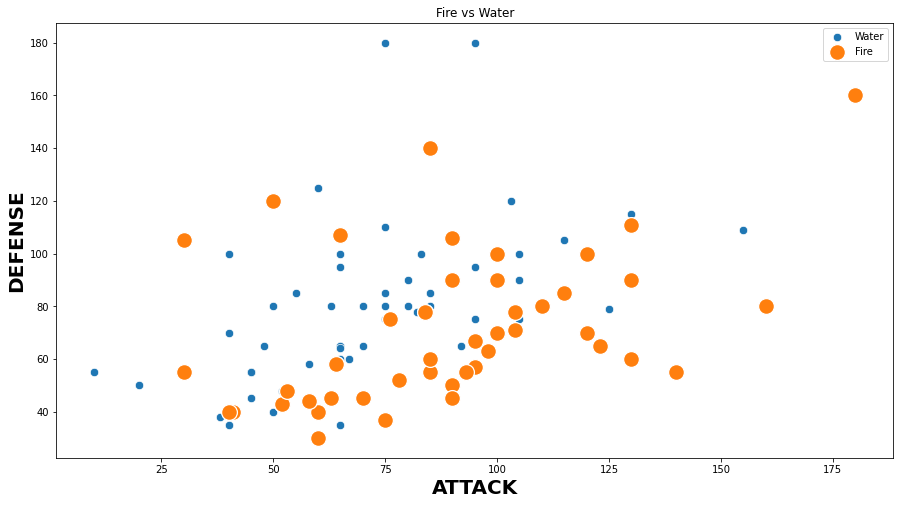

In [19]:

water_type = df[(df["Type 1"]=="Water") | (df["Type 2"]=="Water") ]
fire_type = df[(df["Type 1"]=="Fire") | (df["Type 2"]=="Fire") ]
sns.scatterplot(x = water_type.Attack.head(50), y = water_type.Defense.head(50), label = "Water", s= 70).set_title('Fire vs Water')
sns.scatterplot(x =fire_type.Attack.head(50), y = fire_type.Defense.head(50), label = "Fire", s= 250)
plt.legend() #for printing out the label setted up
plt.gcf().set_size_inches(15,8)
plt.xlabel("ATTACK", fontweight = "bold", fontsize = 20)
plt.ylabel("DEFENSE", fontweight = "bold",fontsize = 20)
